# Stress Level Classification Project

## Objective

This project aims to build a machine learning classification model to predict individual stress levels based on sleep health and lifestyle data. The main goal is to identify key factors contributing to stress and to develop a predictive pipeline using common techniques in supervised learning.

## Dataset Description

We utilize the Sleep Health and Lifestyle dataset, which contains attributes such as age, gender, occupation, sleep duration, sleep quality, physical activity level, BMI category, blood pressure, heart rate, daily steps, and sleep disorder status. The target variable is "Stress Level," categorized into multiple classes representing different stress intensities.

## Workflow Overview

- Data loading and initial exploration
- Data cleaning and handling missing values
- Feature engineering and categorical encoding
- Train-test split for robust evaluation
- Model building using a Decision Tree as baseline
- Performance assessment via accuracy, confusion matrix, and feature importance
- Model tuning to improve generalization
- Project conclusions and suggestions for future work

---

This notebook documents each step with explanations, code, and visualization to provide a comprehensive guide for beginners to intermediate data scientists working on classification problems.


In [24]:
#Loading essential libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [25]:
#Creating a variable and loading the csv file in it
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [26]:
#looking into initial first few rows
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [27]:
#checking the unique values located in stress level column
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

In [28]:
#Stress level distribution
df['Stress Level'].value_counts()

,count
Stress Level,
3,71
8,70
4,70
5,67
7,50
6,46


In [29]:
#Checking missing values if any.
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [30]:
#Although sleep disorder is not our target column still we fill the values with Unknown
df['Sleep Disorder'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1302344328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('Unknown', inplace=True)


In [31]:
#checking the dtypes and null values once again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [32]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Unknown
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Unknown
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Unknown
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [33]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

Since machine learning models can only read numeric data and not string data we need to use label encoders from scikitlearn to convert categorical text data into integers that ml models can use and then fit the encoder on unique values and transform the data into integer codes.

The encoded numbers are saved as a new column named like 'Gender_enc', 'Occupation_enc', etc., so the original data remains untouched.



In [34]:
#Split blood pressure into systolic and diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

#Now we no longer need blood pressure column so we drop it
df = df.drop('Blood Pressure', axis=1)

In [35]:
cat_cols = ['Gender', 'Occupation', 'Sleep Disorder', 'BMI Category']

for col in cat_cols:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col].astype(str))

le_target = LabelEncoder()
df['Stress_enc'] = le_target.fit_transform(df['Stress Level'])

feature_cols = [
  'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
  'Heart Rate', 'Daily Steps',
  'Gender_enc', 'Occupation_enc', 'Sleep Disorder_enc', 'BMI Category_enc','Systolic_BP', 'Diastolic_BP'
]

X = df[feature_cols]
y = df['Stress_enc']


print("Features and target prepared.")
print(X.head())
print(y.head())

Features and target prepared.
   Age  Sleep Duration  Quality of Sleep  Physical Activity Level  Heart Rate  \
0   27             6.1                 6                       42          77   
1   28             6.2                 6                       60          75   
2   28             6.2                 6                       60          75   
3   28             5.9                 4                       30          85   
4   28             5.9                 4                       30          85   

   Daily Steps  Gender_enc  Occupation_enc  Sleep Disorder_enc  \
0         4200           1               9                   2   
1        10000           1               1                   2   
2        10000           1               1                   2   
3         3000           1               6                   1   
4         3000           1               6                   1   

   BMI Category_enc  Systolic_BP  Diastolic_BP  
0                 3        126.0     

We now move further with splitting data for training and testing. This separates my data so can fairly measure model performance after training.

In [36]:
#Assuming X is my features and y is the target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

Train samples: 299 Test samples: 75


What it does:

Splits your features (X) and target (y) into training and testing sets.

test_size=0.2 means 20% of the data is used for testing (evaluation), 80% for training the model.

random_state=42 ensures reproducibility—same split each time you rerun code.

Result: You get 299 training samples and 75 test samples (as you saw).

In [37]:
#Train baseline classifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)



Test Accuracy: 1.0


Step-by-step explanation:

DecisionTreeClassifier(random_state=42): Creates a decision tree model (a flowchart-like structure that splits data based on feature values to make predictions). Random state makes results repeatable.

.fit(X_train, y_train): Trains the model using your training data. The tree "learns" which feature splits best separate stress levels.

.predict(X_test): Uses the trained model to guess the stress levels for your test data.

accuracy_score(y_test, y_pred): Calculates prediction accuracy, i.e., what percent of test samples had their stress level predicted correctly.

You got Test Accuracy: 1.0 ie 100%

Step: Check for Overfitting with Training Accuracy & Cross-Validation
Why?
When your test accuracy hits 100%, it can mean your model is memorizing the training data instead of really learning general patterns. This is called overfitting. To make sure your model will work well on new data (not just this test set), we need to double-check by:

Measuring how well it performs on the training data itself (training accuracy).

Using cross-validation to test the model's stability on multiple splits of the data.

What to watch for:
If training accuracy is much higher than test accuracy, you are likely overfitting.

If cross-validation accuracy is close to test accuracy, your model generalizes well.

In [38]:
# Training accuracy

train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy:", train_acc)

# Cross validation accuracy (5 folds)
cvs = cross_val_score(clf, X, y, cv=5)
print("Cross-validation accuracy:", cvs.mean())

Training accuracy: 1.0
Cross-validation accuracy: 0.9060180180180181


Understanding Training Accuracy and Cross-Validation Accuracy with cross_val_score
Your results:

Training accuracy: 1.0 — Your model perfectly fits the training data.

Cross-validation accuracy: ~0.91 — On average, your model predicts correctly on unseen splits about 91% of the time.

What’s Left in This Project:
Interpreting results and diagnosing model (partly done)

Visualizing performance (confusion matrices, feature importance)

Model hyperparameter tuning (more depth, splits)

Trying and comparing alternative models (Random Forest, Logistic Regression, etc.)

Writing up project summary and insights (for blogging)

Deployment basics (optional for later learning)

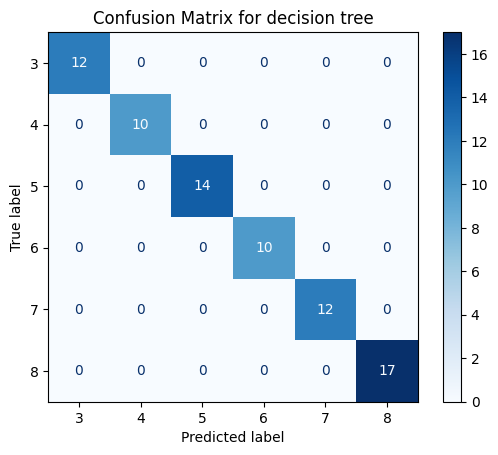

In [39]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix for decision tree')
plt.show()

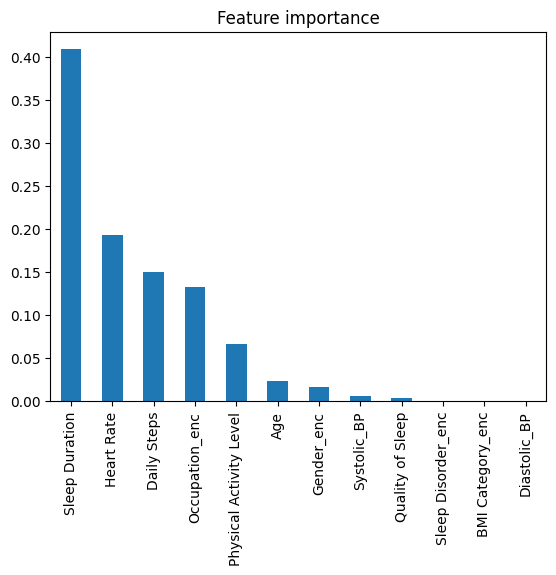

In [40]:
feat_imp = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature importance')
plt.show()

In [41]:
clf.tuned = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.tuned.fit(X_train,y_train)
y_pred_tuned = clf.tuned.predict(X_test)
print('Tuned test accuracy:', accuracy_score(y_test, y_pred_tuned))

Tuned test accuracy: 0.96


Feature Importance
The feature importance plot shows which variables matter most for your classifier.

Example result: Sleep Duration, Heart Rate, and Daily Steps were the strongest predictors.

Use: Helps identify what features to focus on, remove, or engineer for improvement.

Confusion Matrix
The confusion matrix table displays model predictions versus actual class labels.

Perfectly matched diagonal means your model predicted every test instance correctly for each class.

Use: Reveals which specific classes, if any, are being confused by the model.

Tuned Model Accuracy
After restricting the tree’s max depth, the test accuracy is slightly reduced (e.g., 0.96).

Use: Shows trade-off between complexity (overfitting) and generalization (performance on new data).

## Project Conclusion

This project used the Sleep Health and Lifestyle dataset to build a classification model predicting stress levels. The workflow included thorough data cleaning, categorical encoding, and feature engineering, such as splitting blood pressure into systolic and diastolic values.

A Decision Tree classifier was chosen to establish a baseline, and its performance was evaluated using training/test split, cross-validation, confusion matrix, and feature importance. Tuning model complexity helped improve generalization, with the tuned tree achieving strong accuracy.

Key findings:
- Sleep Duration, Heart Rate, and Daily Steps were the most impactful features.
- The model achieved high and stable accuracy across evaluation metrics, and confusion matrix showed excellent class separation.
- Tuning model parameters reduced overfitting and maintained solid generalization.

This analysis demonstrates the core workflow for supervised classification. Future improvements may include model stacking, more feature engineering, exploring alternative algorithms, and extending the dataset for greater robustness.
